In [1]:
#Importing all the required libraries and tools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [2]:
#Firstly we converted text data to excel csv file and than we loaded the same here
data=pd.read_csv(r"C:\Users\Lakshya Pokharna\OneDrive\Desktop\mcdonald.csv")

In [3]:
data.head()

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Visit Frequency,Gender
0,1,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,3,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,5,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
data.describe()

,S.NO,Age
count,1452.000000,1452.000000
mean,726.500000,44.615014
std,419.300608,14.220906
min,1.000000,18.000000
25%,363.750000,33.000000
50%,726.500000,45.000000
75%,1089.250000,57.000000
max,1452.000000,71.000000


In [5]:
#Now when we described the data we found all the major values were missing so we change the yes and no to binary 0 and 1
#To include them in the describe table
data = data.replace(to_replace = ['Yes','No'],value = [1,0])
data


,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Visit Frequency,Gender
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,0,1,0,1,1,0,0,1,1,0,0,0,43,Once a month,Male
1448,1449,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1450,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1451,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female


In [6]:
data.describe()

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Age
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,726.500000,0.553030,0.907713,0.093664,0.867080,0.526171,0.900826,0.599174,0.644628,0.357438,0.199036,0.242424,44.615014
std,419.300608,0.497351,0.289530,0.291461,0.339605,0.499487,0.298998,0.490235,0.478791,0.479410,0.399413,0.428697,14.220906
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,363.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,726.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1089.250000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1452.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   S.NO             1452 non-null   int64 
 1   Yummy            1452 non-null   int64 
 2   Convenient       1452 non-null   int64 
 3   Spicy            1452 non-null   int64 
 4   Fattening        1452 non-null   int64 
 5   Greasy           1452 non-null   int64 
 6   Fast             1452 non-null   int64 
 7   Cheap            1452 non-null   int64 
 8   Tasty            1452 non-null   int64 
 9   Expensive        1452 non-null   int64 
 10  Healthy          1452 non-null   int64 
 11  Disgusting       1452 non-null   int64 
 12  Like             1452 non-null   object
 13  Age              1452 non-null   int64 
 14  Visit Frequency  1452 non-null   object
 15  Gender           1452 non-null   object
dtypes: int64(13), object(3)
memory usage: 181.6+ KB


In [8]:
#Since the data has no null value we will visualize it further without changing
data.corr()

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Age
S.NO,1.000000,-0.024355,0.002855,-0.051882,0.004586,0.025496,-0.017959,-0.001006,-0.027655,-0.021087,-0.043693,0.018645,-0.035272
Yummy,-0.024355,1.000000,0.254168,0.008500,-0.086769,-0.151239,0.104908,0.104199,0.686970,-0.060765,0.246928,-0.419128,-0.282663
Convenient,0.002855,0.254168,1.000000,0.029000,0.036368,-0.107193,0.244490,0.151925,0.290241,-0.164363,0.099351,-0.341563,-0.070399
Spicy,-0.051882,0.008500,0.029000,1.000000,-0.041239,0.054161,0.019673,0.016941,0.060896,0.046306,0.106154,0.033261,0.146048
Fattening,0.004586,-0.086769,0.036368,-0.041239,1.000000,0.319143,0.046557,-0.026326,-0.087257,0.088832,-0.338314,0.145743,-0.139035
Greasy,0.025496,-0.151239,-0.107193,0.054161,0.319143,1.000000,-0.056444,-0.072526,-0.162809,0.146544,-0.210944,0.321171,-0.233040
Fast,-0.017959,0.104908,0.244490,0.019673,0.046557,-0.056444,1.000000,0.250514,0.143589,-0.199668,0.032670,-0.134906,-0.022763
Cheap,-0.001006,0.104199,0.151925,0.016941,-0.026326,-0.072526,0.250514,1.000000,0.138510,-0.721282,0.129662,-0.124314,0.016107
Tasty,-0.027655,0.686970,0.290241,0.060896,-0.087257,-0.162809,0.143589,0.138510,1.000000,-0.103771,0.225969,-0.436190,-0.195721
Expensive,-0.021087,-0.060765,-0.164363,0.046306,0.088832,0.146544,-0.199668,-0.721282,-0.103771,1.000000,-0.069463,0.198455,-0.069972


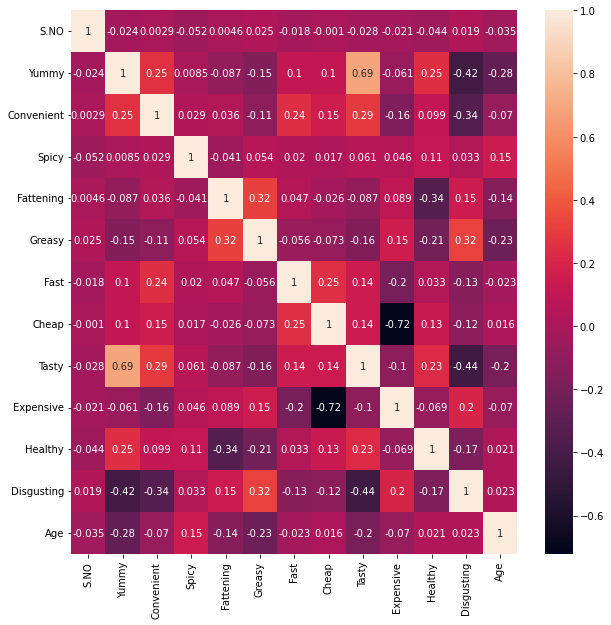

In [9]:
#Firstly we are using heatmap to visualize the consumer data
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

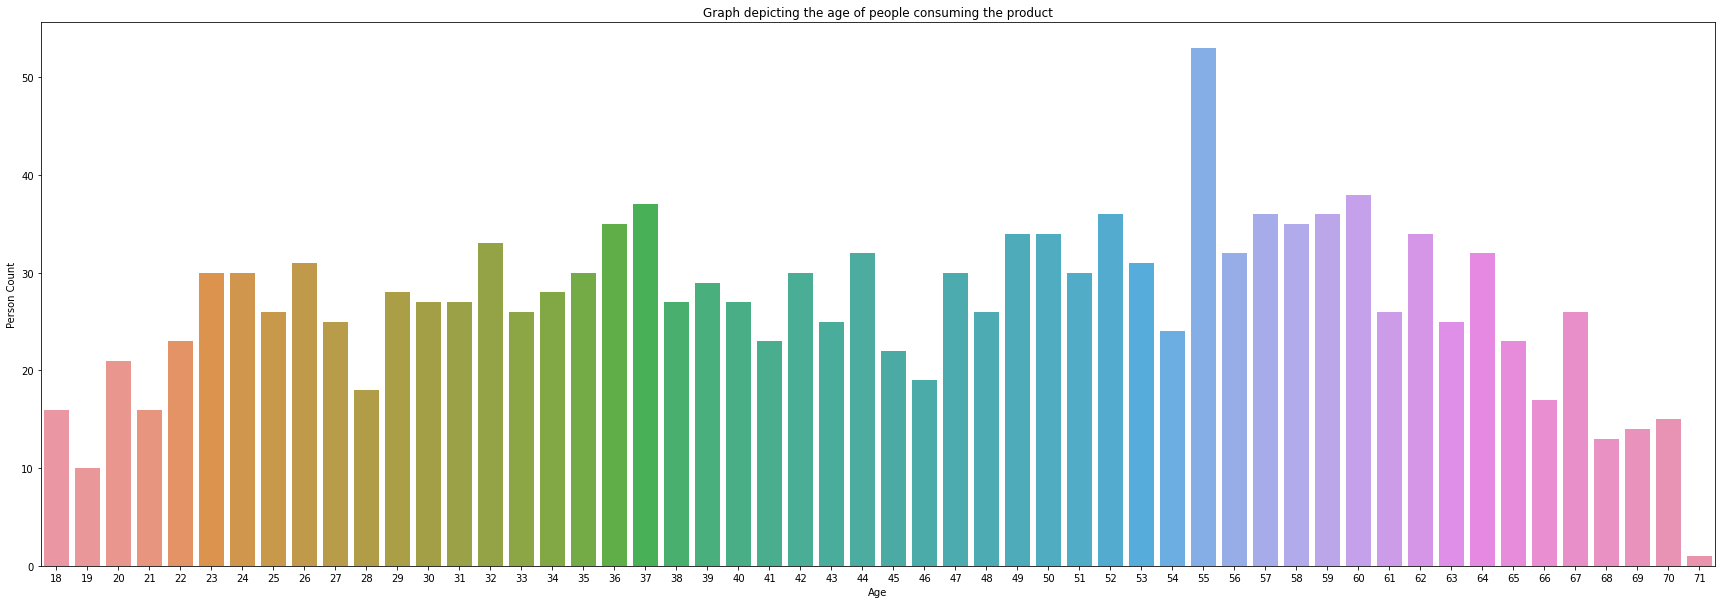

In [10]:
#We will now plot the age group of all the consumers in the mcdonald data
plt.figure(figsize=(30,10))
sns.countplot(x=data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.title('Graph depicting the age of people consuming the product')
plt.show()

In [11]:
#Above graph depicts that the major consumers are 55 years of age and they are more than 50 in the count.
#So what we need to find is that what does this particular section likes

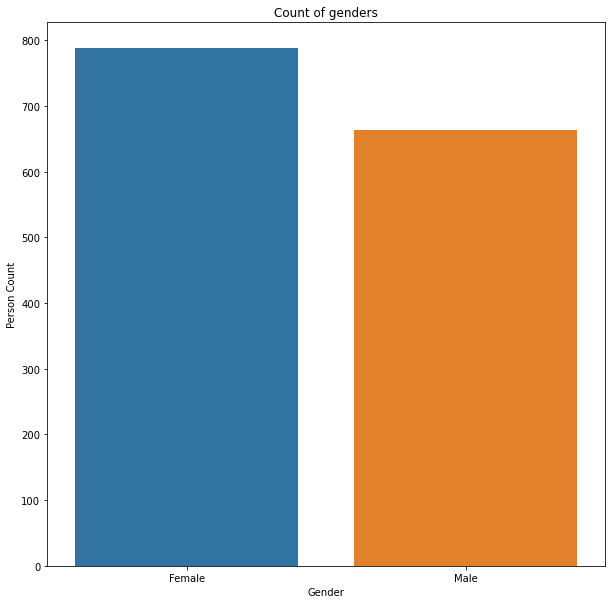

In [12]:
#plotting count of genders
plt.figure(figsize=(10,10))
sns.countplot(x=data.Gender)
plt.xlabel("Gender")
plt.ylabel("Person Count")
plt.title('Count of genders')
plt.show()
#This suggest female consumers are more

In [13]:
data

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Visit Frequency,Gender
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,0,1,0,1,1,0,0,1,1,0,0,0,43,Once a month,Male
1448,1449,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1450,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1451,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female


In [14]:
data = data.replace(to_replace = ['I love it!+5','I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4'],value = [5,-5,-4,-3,-2,-1,0,1,2,3,4])
data.head()


,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Visit Frequency,Gender
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


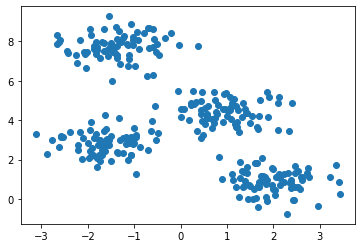

In [18]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])


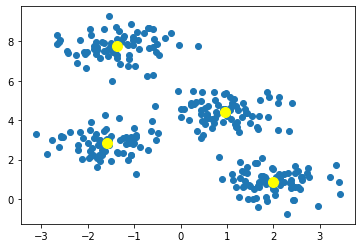

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()

C:\Users\Lakshya Pokharna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


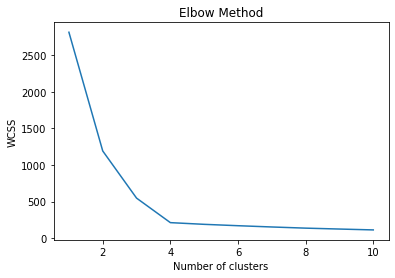

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
data.shape

(1452, 16)

In [21]:
data.keys
data

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,Visit Frequency,Gender
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,0,1,0,1,1,0,0,1,1,0,0,0,43,Once a month,Male
1448,1449,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1450,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1451,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female


In [22]:
data.drop(['Visit Frequency','Gender'], axis=1, inplace=True)
data

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,0,1,0,1,1,0,0,1,1,0,0,0,43
1448,1449,0,1,0,1,1,0,0,0,1,0,1,-5,47
1449,1450,1,1,0,1,0,0,1,1,0,1,0,2,36
1450,1451,1,1,0,1,0,1,0,1,1,0,0,3,52


In [23]:
pca = PCA(n_components=11)

principalComponents = pca.fit_transform(X = data)

# to get how much variance was retained
print(pca.explained_variance_ratio_)

#create dataframe of pca 
pca_data = pd.DataFrame(data = principalComponents
             , columns = ['pca 1', 'pca 2','pca 3', 'pca 4','pca 5', 'pca 6','pca 7', 'pca 8','pca 9', 'pca 10','pca 11'])
pca_data.head()

[9.98786526e-01 1.15143504e-03 5.33154694e-05 2.28887088e-06
 1.34597589e-06 1.08687398e-06 8.87527630e-07 6.22105382e-07
 5.43175862e-07 4.58373270e-07 4.25639645e-07]


,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11
0,725.518720,-15.723532,2.961465,-0.045566,0.410411,-0.285948,-0.397937,-0.250763,-0.373206,-0.222310,0.110713
1,724.507259,-5.427348,-1.503628,0.264722,-0.629440,0.485726,-0.179712,-0.045585,-0.045232,-0.156108,-0.098177
2,723.520384,-16.479793,-1.076785,0.919713,-0.347674,0.356131,0.679601,-0.769400,-0.561483,0.457683,0.418246
3,722.528969,-23.284227,-4.456053,-0.106330,-1.261081,0.143634,0.227281,0.878328,0.004123,-0.140404,-0.295366
4,721.504823,-3.454381,-1.252294,-0.449357,-0.482878,-0.708817,0.796314,-0.650026,-0.135075,-0.443925,0.086174


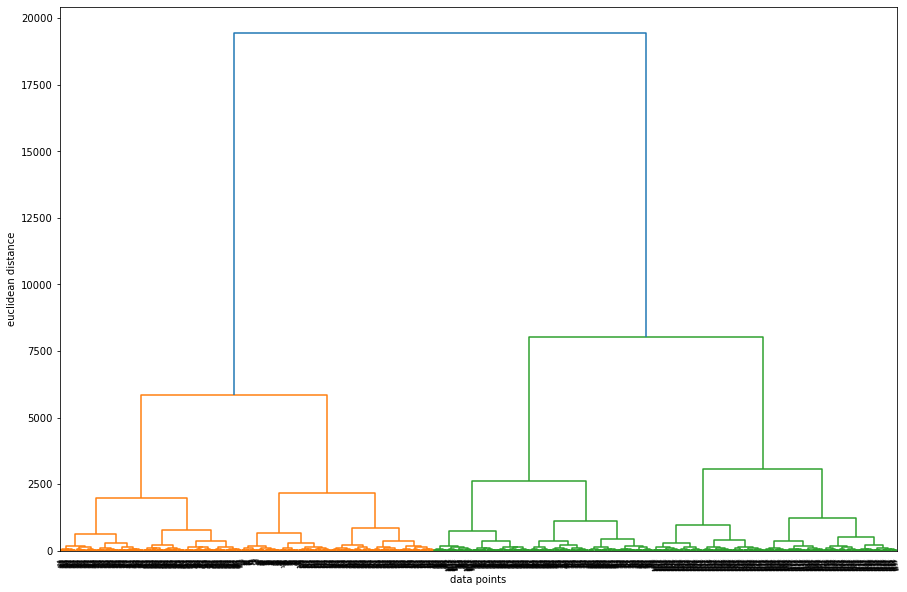

In [24]:
dend = linkage(data,method="ward")
plt.figure(figsize=(15,10))
dendrogram(dend,leaf_rotation = 100)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [26]:
data['cluster']=kmeans.labels_
data.head()

,S.NO,Yummy,Convenient,Spicy,Fattening,Greasy,Fast,Cheap,Tasty,Expensive,Healthy,Disgusting,Like,Age,cluster
0,1,0,1,0,1,0,1,1,0,1,0,0,-3,61,0
1,2,1,1,0,1,1,1,1,1,1,0,0,2,51,0
2,3,0,1,1,1,1,1,0,1,1,1,0,1,62,0
3,4,1,1,0,1,1,1,1,1,0,0,1,4,69,0
4,5,0,1,0,1,1,1,1,0,0,1,0,2,49,0


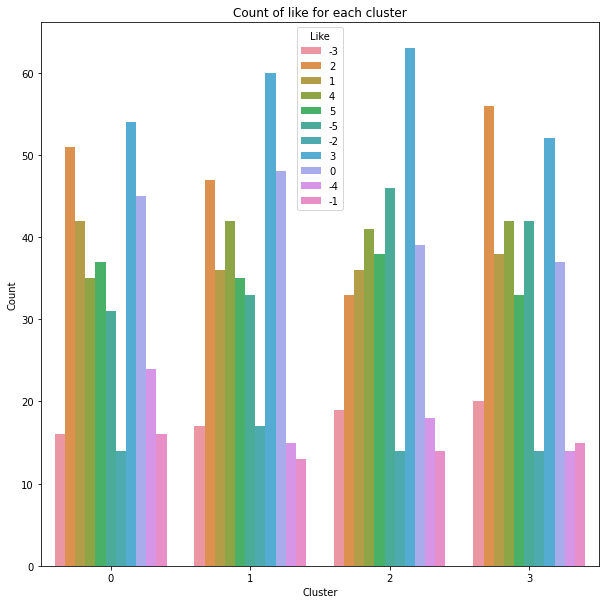

In [27]:
data.groupby('cluster').mean()
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Like',data=data)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of like for each cluster")
plt.show()